In [ ]:
from google.colab.patches import cv2_imshow # for image display
import numpy as np
import pandas as pd
import cv2 as cv
from skimage import io
from PIL import Image
import matplotlib.pylab as plt

1. Lisibilité. Que doit-on faire pour augmenter la lisibilité de l’image aquitain.tif (dans le dossier du TP) ?

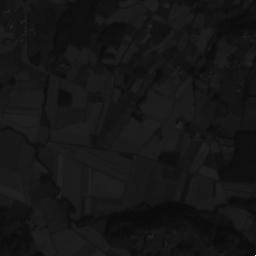

In [ ]:
#loading image
image = io.imread('/content/aquitain.tif')

#showing image
cv2_imshow(image)

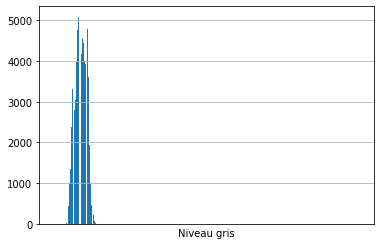

In [ ]:
#initiate dict
dict_image = { str(i) : 0 for i in range(256)}

for row in image:
  for pixel in row:
    dict_image[str(int(pixel))] += 1

#plot hist
def plot_hist(hist):
        plt.bar(hist.keys(), hist.values())
        plt.xlabel("Niveau gris")
        ax = plt.gca()
        # ax.set_title("")
        ax.axes.xaxis.set_ticks([])
        plt.grid(True)
        plt.show()


plot_hist(dict_image)

In [ ]:
# although the histogram does not show us this, we have some abnormal pixels,
# whose value is very different from the others. 
# We can apply a filter to clean up these anomalies

print("max before filtering: ", np.amax(image)) 
print("min before filtering: ", np.amin(image)) 

# In orther to get rid of anomalies we change the pixels whose values are bigger 
# than 200 to 0.
for i in range(len(image)):
  for j in range(len(image[0,:])):
    pixel = image[i,j]
    if pixel > 200:
      image[i,j] = 0

print("max after filtering: ", np.amax(image)) 
print("min after filtering: ", np.amin(image))

max before filtering:  250
min before filtering:  10
max after filtering:  40
min after filtering:  0


old image


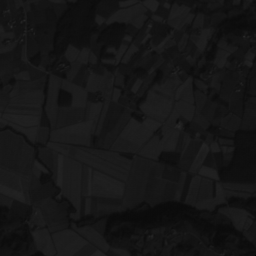

new image


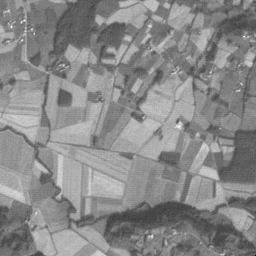

new histogram


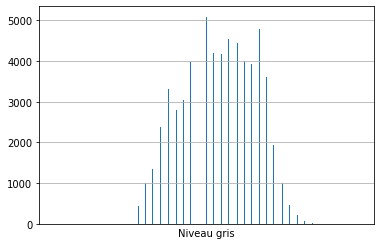

In [ ]:
new_image = np.zeros(np.shape(image))

# getting max and min
max = np.amax(image)
min = np.amin(image)

# image normalization
for i in range(len(image)):
  for j in range(len(image[0,:])):
    new_image[i,j] = (image[i,j] - min)*255/(max - min)


#show image before normalization
print("old image")
cv2_imshow(image)

#show image after normalization
print("new image")
cv2_imshow(new_image)

dict_new_image = { str(i) : 0 for i in range(256)}

for row in new_image:
  for pixel in row:
    dict_new_image[str(int(pixel))] += 1

print("new histogram")
plot_hist(dict_new_image)



2 a. Lissage. 

Le tableau ci-dessous rend l'image plus floue. On dit que c'est un filtre passe-bas. Appliquer ce tableau revient en fait à remplacer la valeur de chaque pixel par la moyenne des 9 pixels formant un carré autour du pixel visé. Implémenter et tester ce filtre.


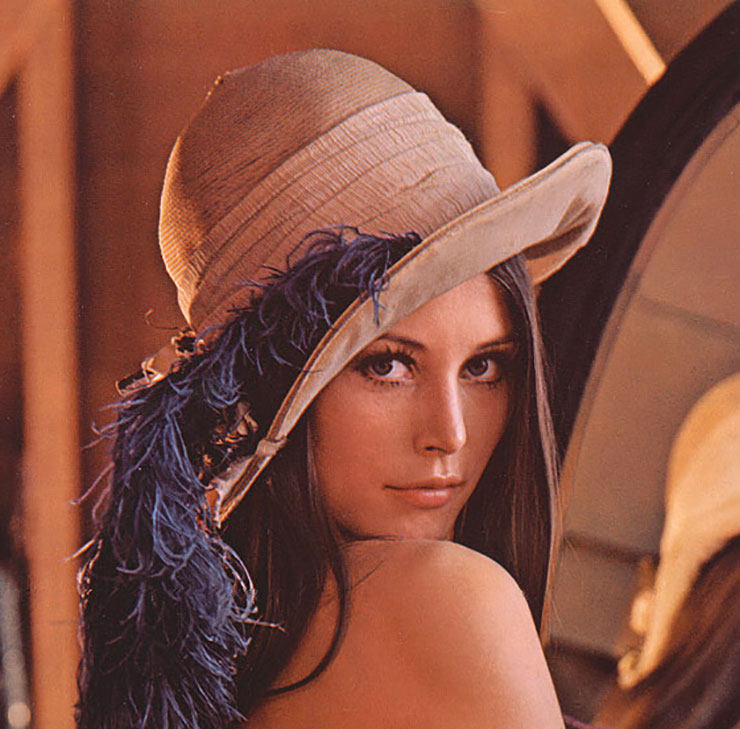

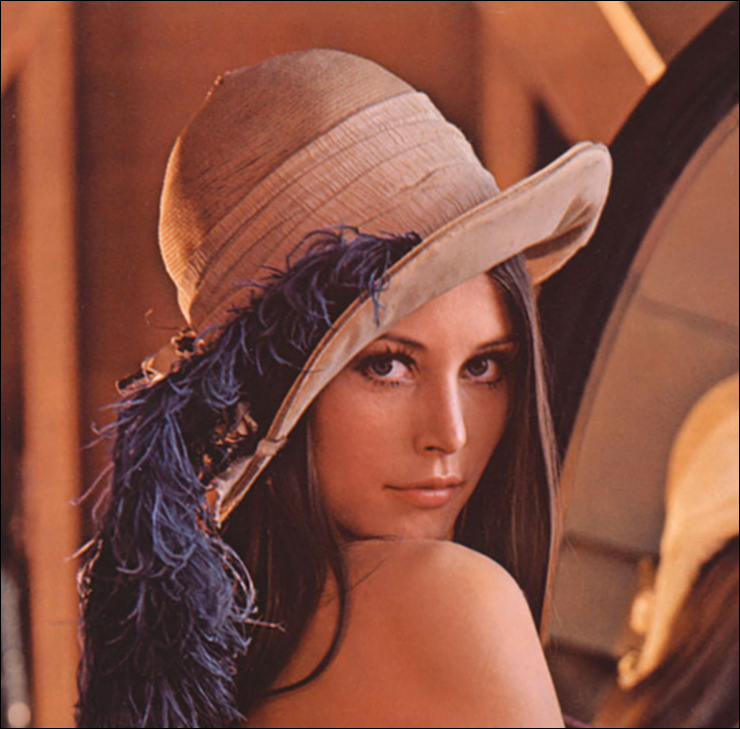

In [ ]:
filtre = np.array(([1/9,1/9,1/9],
                   [1/9,1/9,1/9],
                   [1/9,1/9,1/9]))

#loading image
image = io.imread('/content/Lena.jpg')

# Converting to rgb
image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

#showing image
cv2_imshow(image)

########################################
# here will be the start of the function
########################################

# get image dimensions
h_image, l_image, n = np.shape(image)

# get image dimensions
h_filtre, l_filtre = np.shape(filtre)

assert h_filtre == l_filtre, "We should have a square filter"
assert h_filtre%2 == 1, "The matrix dimension should be odd"

extra_edge_pixels = h_filtre//2
# extra_edge_pixels = 50


# initialize bigger image
bigger_image = np.zeros((h_image+extra_edge_pixels, l_image+extra_edge_pixels, 3))

# # put colors into the edge pixels
# for i in range(len(bigger_image)):
#   for j in range(len(bigger_image[0,:])):



# for i in range(len(bigger_image)):
#   for j in range(len(bigger_image[0,:])):
#     if i < extra_edge_pixels:


new_image = np.zeros((h_image, l_image, n))


# iterate over pixels
for i in range(extra_edge_pixels, h_image - extra_edge_pixels):
  for j in range(extra_edge_pixels, l_image - extra_edge_pixels):
    for k in range(n):
      conv_sum = 0
      surroundings_matrix = image[i-extra_edge_pixels:i+extra_edge_pixels+1,j-extra_edge_pixels:j+extra_edge_pixels+1,k]
      # cv2_imshow(surroundings_matrix)
      for a in range(len(surroundings_matrix)):
        conv_sum += np.dot(filtre[a], surroundings_matrix[a])

      new_image[i,j,k] = conv_sum
 
cv2_imshow(new_image)

In [ ]:
# put this into a function

def conv(matrix, image):
  # get image dimensions
  h_image, l_image, n = np.shape(image)

  # get image dimensions
  h_filtre, l_filtre = np.shape(filtre)

  assert h_filtre == l_filtre, "We should have a square filter"
  assert h_filtre%2 == 1, "The matrix dimension should be odd"

  extra_edge_pixels = h_filtre//2

  # initialize final image array
  new_image = np.zeros((h_image, l_image, n))


  # iterate over pixels
  for i in range(extra_edge_pixels, h_image - extra_edge_pixels):
    for j in range(extra_edge_pixels, l_image - extra_edge_pixels):
      for k in range(n):
        conv_sum = 0
        surroundings_matrix = image[i-extra_edge_pixels:i+extra_edge_pixels+1,j-extra_edge_pixels:j+extra_edge_pixels+1,k]
        # cv2_imshow(surroundings_matrix)
        for a in range(len(surroundings_matrix)):
          conv_sum += np.dot(filtre[a], surroundings_matrix[a])

        new_image[i,j,k] = conv_sum

  return new_image

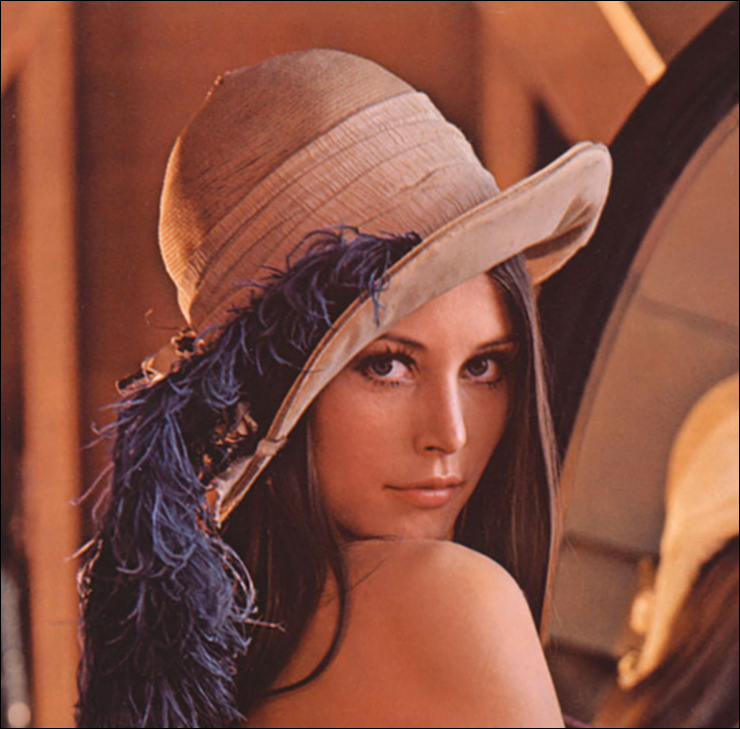

In [ ]:
# Smooth filtre 
matrix = np.array(([1/9,1/9,1/9],
                   [1/9,1/9,1/9],
                   [1/9,1/9,1/9]))

#apply convolution function
conv_img = conv(matrix, image)

#show image
cv2_imshow(conv_img)

b. Accentuation. À l'inverse, le tableau ci-après rendra l'image plus nette.
C'est un filtre passe-haut. Attention ! Il peut arriver que la nouvelle valeur
ne soit plus comprise entre 0 et 255. Il faudra donc toujours prendre min(x,
255) et max(x, 0), où x est la nouvelle valeur. Implémenter et testez ce
filtre.

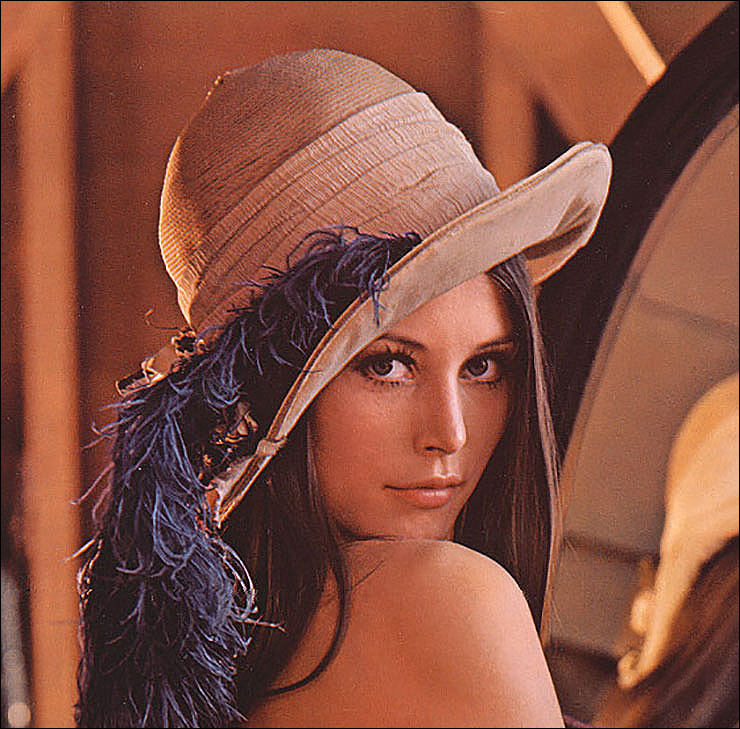

In [ ]:
# accentuation filter
filtre = np.array(([0,-0.5,0],
                   [-0.5,3,-0.5],
                   [0,-0.5,0]))

# Apply convolution function
conv_img = conv(filtre, image)

# Show image
cv2_imshow(conv_img)

c. Gradient (filtre de Sobel). Pour faire simple, l'opérateur calcule le gradient
de l'intensité de chaque pixel. Ceci indique la direction de la plus forte
variation du clair au sombre, ainsi que le taux de changement dans cette
direction. On connaît alors les points de changement soudain de
luminosité, correspondant probablement à des bords. Implémentant ce
filtres et testez-le sur Matlab.

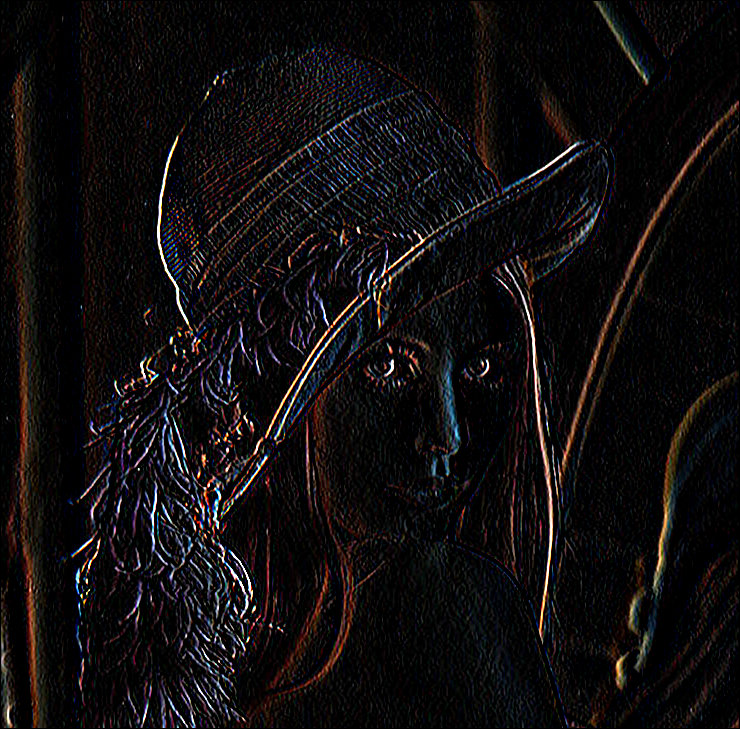

In [ ]:
# Gradient filter
filtre = np.array(([-1,0,1],
                   [-2,0,2],
                   [-1,0,1]))

# Apply convolution function
conv_img = conv(filtre, image)

# Show image
cv2_imshow(conv_img)

d. Le filtre médian. La technique de filtre médian est largement utilisée en
traitement d'images numériques, car elle permet de réduire le bruit tout
en conservant les contours de l'image. L'idée principale du filtre médian
est de remplacer chaque pixel par la valeur médiane de son voisinage.
Ce type de filtre médian est appelé « marginal ». Considérons neuf pixels
en niveaux de gris, dont une valeur est aberrante (ici 255):

In [ ]:
# this time we need to modify our function
def median_conv(image):
  # get image dimensions
  h_image, l_image, n = np.shape(image)

  # get image dimensions
  h_filtre, l_filtre = np.shape(filtre)

  assert h_filtre == l_filtre, "We should have a square filter"
  assert h_filtre%2 == 1, "The matrix dimension should be odd"

  extra_edge_pixels = h_filtre//2

  # initialize final image array
  new_image = np.zeros((h_image, l_image, n))


  # iterate over pixels
  for i in range(extra_edge_pixels, h_image - extra_edge_pixels):
    for j in range(extra_edge_pixels, l_image - extra_edge_pixels):
      for k in range(n):
        surroundings_matrix = image[i-extra_edge_pixels:i+extra_edge_pixels+1,j-extra_edge_pixels:j+extra_edge_pixels+1,k]

        # Assign median to pixel
        new_image[i,j,k] = np.median(surroundings_matrix, axis = None)

  return new_image


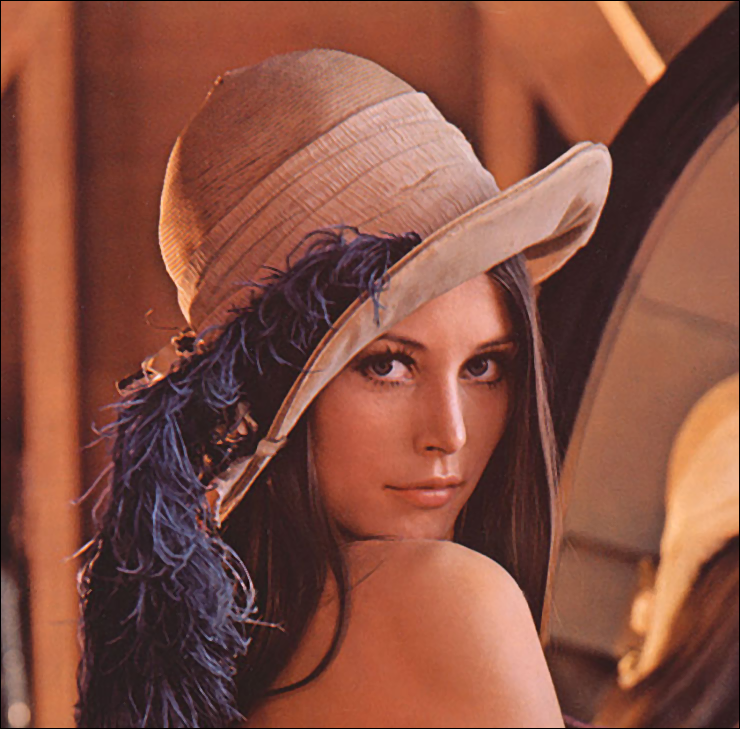

In [ ]:
# Apply median convolution function
conv_img = median_conv(image)

# Show image
cv2_imshow(conv_img)

In [ ]:
# Here will create a noisy image on which will be applied the median convolution

import random

# get noisy image
def noise_to_img(image, size_noise):
  #get image's size
  h,l, n = np.shape(image)

  # generate random coordinates to noise
  h_coord_noise = [random.randrange(0, h, 1) for i in range(size_noise)]
  l_coord_noise = [random.randrange(0, l, 1) for i in range(size_noise)]

  for i,j in zip(h_coord_noise, l_coord_noise):
    image[i,j] = np.array([255,255,255])

  return image

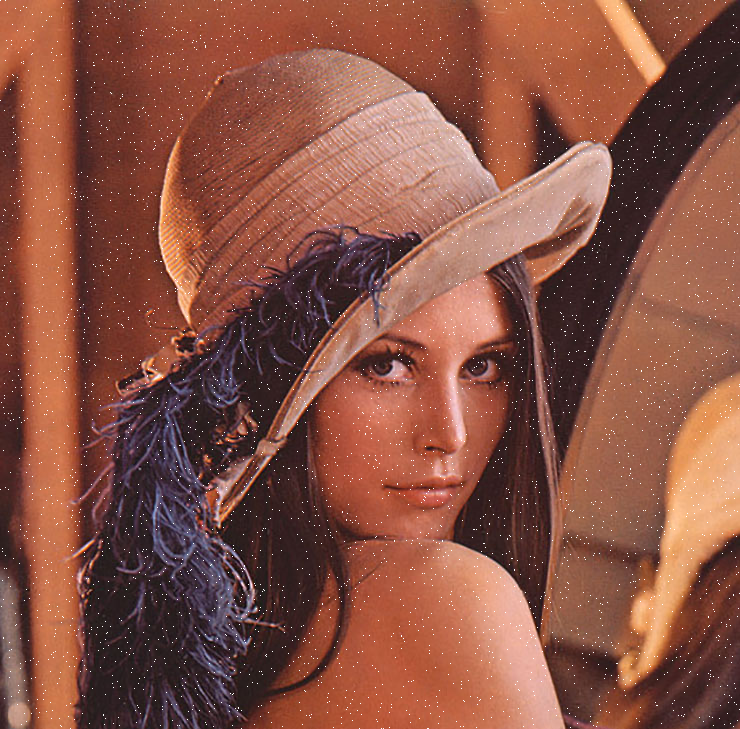

In [ ]:
# Put noise to the image
noisy_img = noise_to_img(image, 5000)

# Show image
cv2_imshow(noisy_img)

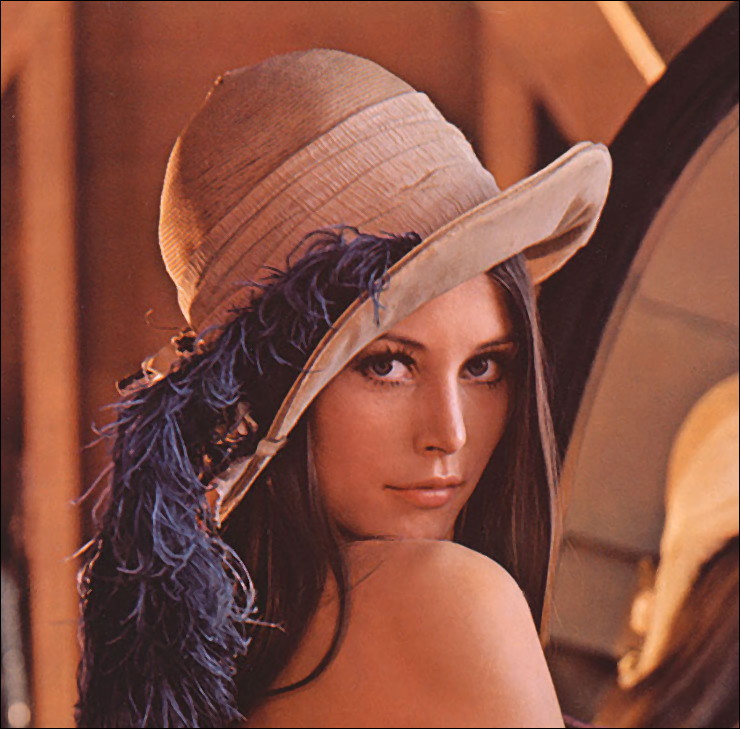

In [ ]:
# apply median conv function on noisy image
rec_img = median_conv(noisy_img)

# Show image
cv2_imshow(rec_img)

3. Filtrage bruit périodique. Proposez un algorithme / script qui permet de
« nettoyer » les images noise.tif et clown.tif

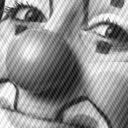

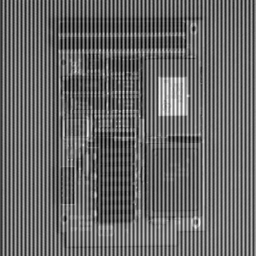

In [ ]:
#loading images
clown = io.imread('/content/clown.tif')
noise = io.imread('/content/noise.tif')

#showing image
cv2_imshow(clown)
cv2_imshow(noise)

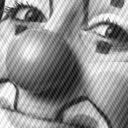

/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


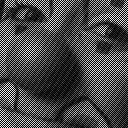

In [ ]:
from numpy.fft.helper import fftshift, ifftshift

fft_clown = (np.fft.fft2(clown))

shiffted_fft_clown = fftshift(fft_clown)

rec_img = np.fft.ifft2(shiffted_fft_clown)

cv2_imshow(clown)
cv2_imshow(rec_img)



/usr/local/lib/python3.7/dist-packages/google/colab/patches/__init__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
  a = a.clip(0, 255).astype('uint8')


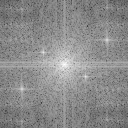

In [ ]:
# Transform images to the frequency signal
fft_clown = (np.fft.fft2(clown))

# shift it so that the low freqs are in the middle
shiffted_fft_clown = fftshift(fft_clown)

# get its log version
log_shiffted_fft_clown = 20*np.log(shiffted_fft_clown)

#show image
cv2_imshow(log_shiffted_fft_clown)

# we cleary see the small peaks of frequence causing this periodic noise
# the intention will be to somehow get rid of them

Filtre


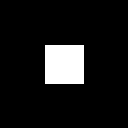

image filtré


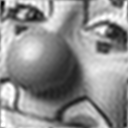

In [ ]:

#get image dim
h, l = np.shape(clown)

# apply filter to it
#generate filter's array
filter = np.ones((h,l))

# set the width of the border of the filter
filter_border = 45

for i in range(h):
  for j in range(l):
    if i < filter_border or j < filter_border or i > h - filter_border or j > l - filter_border:
      filter[i,j] = 0

shiffted_filtered_fft_clown = shiffted_fft_clown*filter

print("Filtre")

#show filter
cv2_imshow(filter*255)

#unshifft freq img
filtered_fft_clown = ifftshift(shiffted_filtered_fft_clown)

# change from frequence domain to spatial domain
rec_img = np.fft.ifft2(filtered_fft_clown)

print("image filtré")

# show filtred image
cv2_imshow(abs(rec_img))


4. Atenuation / élimination du bruit. Proposez un script qui permet d’éliminer le bruit
de l’images mercury.tif et noisy_Lena.png.


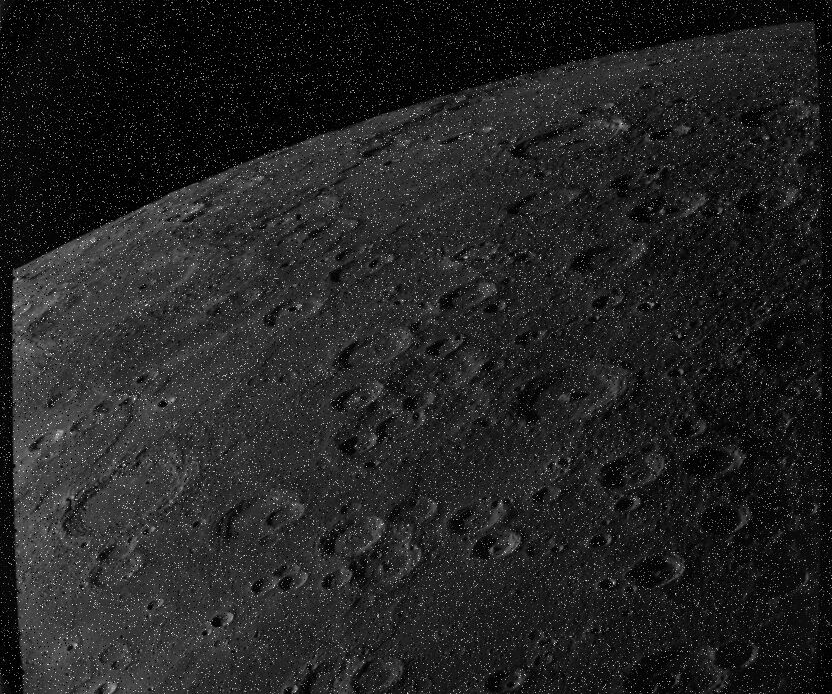

In [ ]:
#loading images
noisy_Lena = io.imread('/content/mercury.tif')

# Converting to rgb
noisy_Lena = cv.cvtColor(noisy_Lena, cv.COLOR_BGR2RGB)

#showing image
cv2_imshow(noisy_Lena)

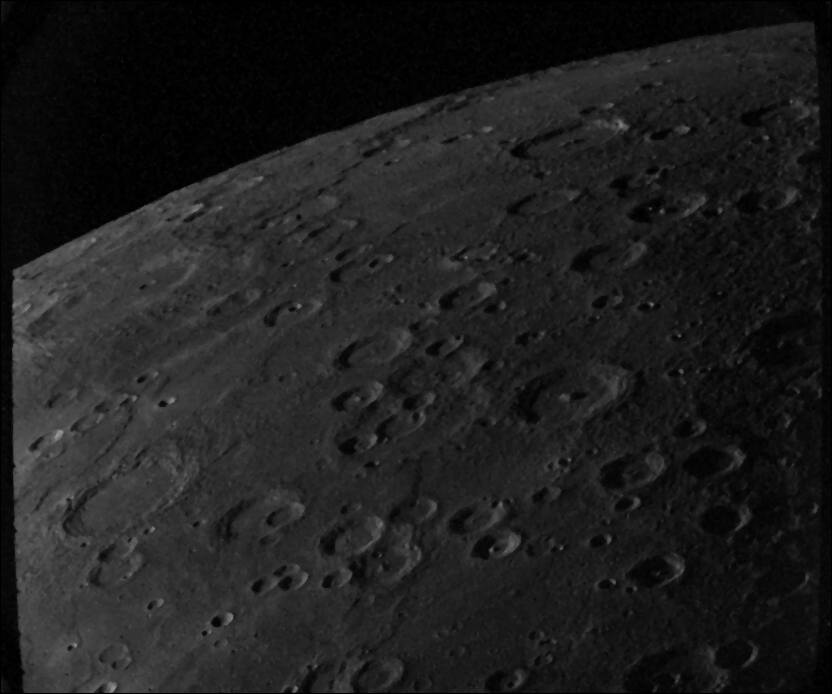

In [ ]:
#apply median convolution to noisy planet to take the noise out

# apply median conv function on noisy image twice
rec_Lena1 = median_conv(noisy_Lena)
rec_Lena2 = median_conv(rec_Lena1)

# Show image
cv2_imshow(rec_Lena2)